DIABETES

Research Topic

Diabetes is a chronic disease impacting millions worldwide. Early identification of risk factors can improve prevention and treatment.


Object
To explore the relationship between 8 variables (age, gender, BMI, hypertension, heart disease, smoking history, HbA1c levels, blood glucose levels)  and diabetes status (positive/negative)  
The positive (or presence) of diabetes --> 1
The negative (or absence) of diabetes --> 0

Research Question
- From the aforementioned variables (or factors) are related strongly with the disease of diabetes ?
- How specific variables such as BMI, age, HbA1c, smoking history, blood glucose levels differ between diabetic and non - diabetic groups ?
-Are males or females more vulnerable?
- What BMI range has the highest prevalence of diabetes?
-Are hypertensive patients more prone to diabetes than non-hypertensive patients?
-What is the relationship between smoking history and diabetes prevalence?

IMPORT LIBRARIES

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Import Neccessary libraries
import numpy as np
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the decimal format
pd.options.display.float_format = "{:.2f}".format

#Input the dataset, check for each column

In [4]:
#upload the dataset file
from google.colab import files
uploaded = files.upload()

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv


In [6]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [7]:
#Understand the data structure
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


In [8]:
df.info()  #check the columns types, dtype, non null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [9]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,41.89,0.07,0.04,27.32,5.53,138.06,0.09
std,22.52,0.26,0.19,6.64,1.07,40.71,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.63,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,60.00,0.00,0.00,29.58,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


In [10]:
df.dtypes

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
smoking_history,object
bmi,float64
HbA1c_level,float64
blood_glucose_level,int64
diabetes,int64


In [11]:
df.shape
#100.000 rows and 9 variables

(100000, 9)

#COUNT THE NUMERIC AND CATEGORICAL COLUMNS

In [12]:
# Count numeric columns
num_cols = df.select_dtypes(include=['number']).columns
num_count = len(num_cols)

# Count categorical columns (including text)
cat_cols = df.select_dtypes(include=['object', 'category']).columns
cat_count = len(cat_cols)

print(f"Number of numerical columns: {num_count}")
print(f"Which are the categorical columns: {cat_cols}")
print(f"Number of categorical columns: {cat_count}")
print(f"Which are the numerical columns: {num_cols}")

Number of numerical columns: 7
Which are the categorical columns: Index(['gender', 'smoking_history'], dtype='object')
Number of categorical columns: 2
Which are the numerical columns: Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')


#EDA

In [13]:
df[num_cols].describe()

#Typical values (mean, median)

#Spread (standard deviation)

#Outliers (min/max vs. mean)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,41.89,0.07,0.04,27.32,5.53,138.06,0.09
std,22.52,0.26,0.19,6.64,1.07,40.71,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.63,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,60.00,0.00,0.00,29.58,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


#Handling Duplicates


In [14]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data)

number of duplicate rows:         gender   age  hypertension  heart_disease smoking_history   bmi  \
2756     Male 80.00             0              0         No Info 27.32   
3272   Female 80.00             0              0         No Info 27.32   
3418   Female 19.00             0              0         No Info 27.32   
3939   Female 78.00             1              0          former 27.32   
3960     Male 47.00             0              0         No Info 27.32   
...       ...   ...           ...            ...             ...   ...   
99980  Female 52.00             0              0           never 27.32   
99985    Male 25.00             0              0         No Info 27.32   
99989  Female 26.00             0              0         No Info 27.32   
99990    Male 39.00             0              0         No Info 27.32   
99995  Female 80.00             0              0         No Info 27.32   

       HbA1c_level  blood_glucose_level  diabetes  
2756          6.60              

In [15]:
#remove duplicates
df = df.drop_duplicates()

Check the number of distinct values

In [16]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values}")
    print(df[column].unique())


gender: 3
['Female' 'Male' 'Other']
age: 102
[80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
hypertension: 2
[0 1]
heart_disease: 2
[1 0]
smoking_history: 6
['never' 'No Info' 'current' 'former' 'ever' 'not current']
bmi: 4247
[25.19 27.32 23.45 ... 59.42 44.39 60.52]
HbA1c_level: 18
[6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]
blood_glucose_level: 18
[140  80 158 155  85 200 145 100 130 160 126 159  90 

#Check for missing values,  outliers, strange values

In [17]:
#misisng value
df.isnull().sum()
#there is no missing value in the dataset

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


#Remove the column other from gender (not necessary to have)


In [18]:
df = df[df['gender'] != 'Other']

#UNIVARIATE ANALYSIS


#PLOT HISTOGRAM
To see the distribution of each numeric feature

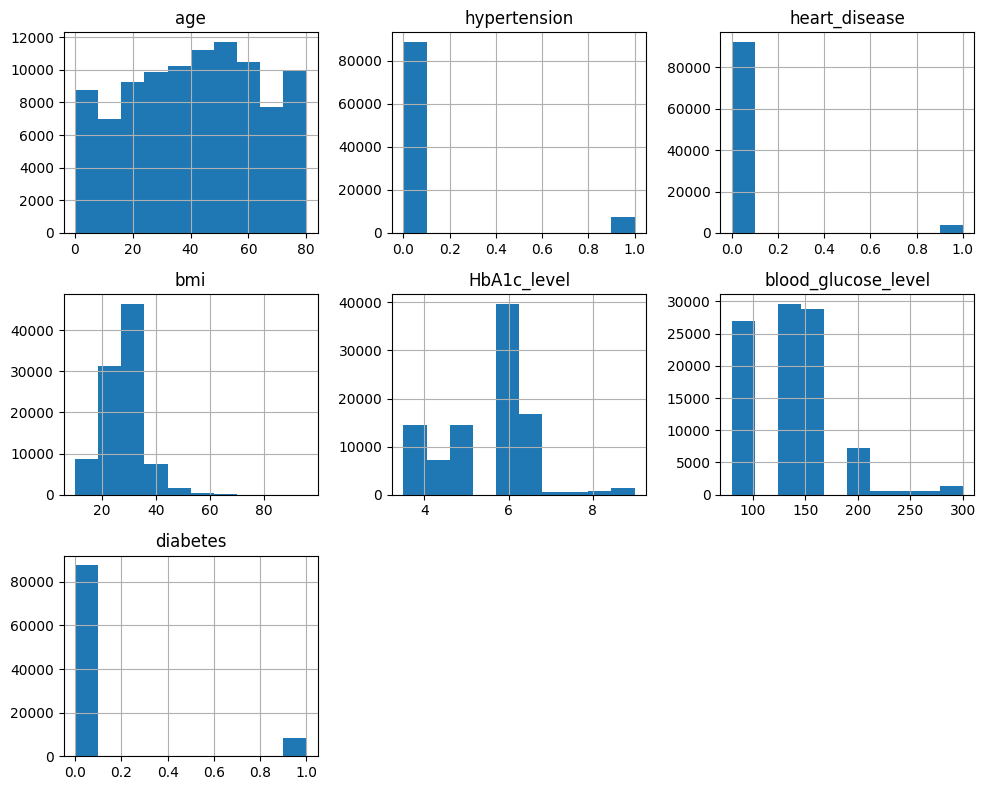

In [19]:
df[num_cols].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

1. Based the histogram, the variable ***age*** (scale) range from 0 to 80.
We can see a slightly drop at age 10 - 20 and 60 to 70.

2. For the variable ***hypertension*** (nominal) (0 or 1)
Most values are 0 (no hypertension) and less 1 (have hypertension)
This show that hypertension is rare in the dataset.

3. For the variable ***heart disease*** (nominal: 0 --> no, 1 ---> yes)
Very few people in the dataset have heart disease.

4. ***BMI*** variable is skewed to the right ( positively skewed) and as we see most patients have BMI around 20-30 and some outliers>40. (In the next step we will see the outliers)

5. The variable ***HbA1c_level*** mostly are between 5 and 7, with the peak at 6, it seems that this distribution might be normal distribution.

6. The variable blood glucose level concentrated around 100 and 200. We can see some very high values > 250 and that might be outliers or extreme diabetes  cases.

7. Last but not least, is the ***diabetes*** ( target variable), this variable are imbalced because the majority of the people have non diabetes (0) and minority have.



#CATEGORICAL
We can see them with bar chart, pie chart

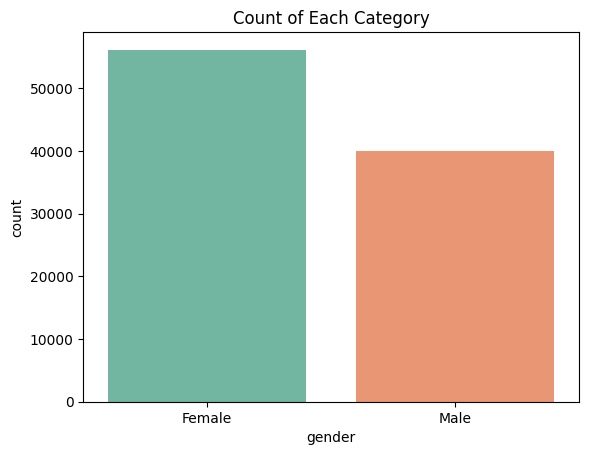

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='gender', data=df, palette='Set2')  # Replace 'gender' with your column name
plt.title("Count of Each Category")
plt.show()


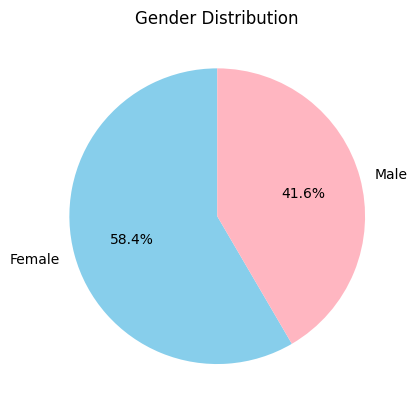

In [21]:
df['gender'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['skyblue', 'lightpink'],  # Match order of gender categories
    startangle=90
)
plt.title("Gender Distribution")
plt.ylabel("")  # Hides 'gender' label
plt.show()


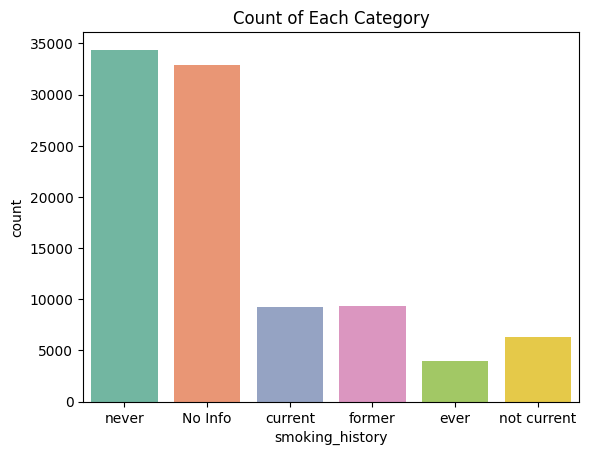

<Figure size 640x480 with 0 Axes>

In [22]:
sns.countplot(x='smoking_history', data=df, palette='Set2')  # Replace 'gender' with your column name
plt.title("Count of Each Category")
plt.show()
plt.savefig("Count of Each Category smoking_history", dpi=300, bbox_inches='tight')

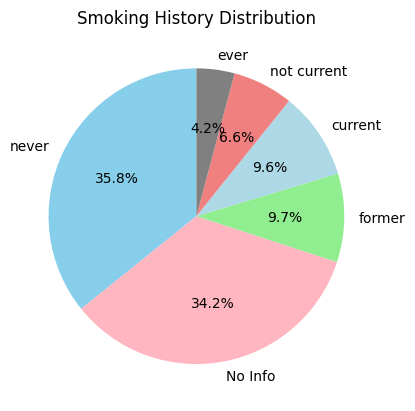

<Figure size 640x480 with 0 Axes>

In [23]:
df['smoking_history'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['skyblue', 'lightpink', 'lightgreen', 'lightblue', 'lightcoral', 'grey'],  # Valid colors
    startangle=90
)
plt.title("Smoking History Distribution")
plt.ylabel("")  # Optional: hides axis label
plt.show()
plt.savefig("smoking_histort_distribution.png", dpi=300, bbox_inches='tight')

#BIVARIATE ANALYSIS

Check the relationship between 2 variables

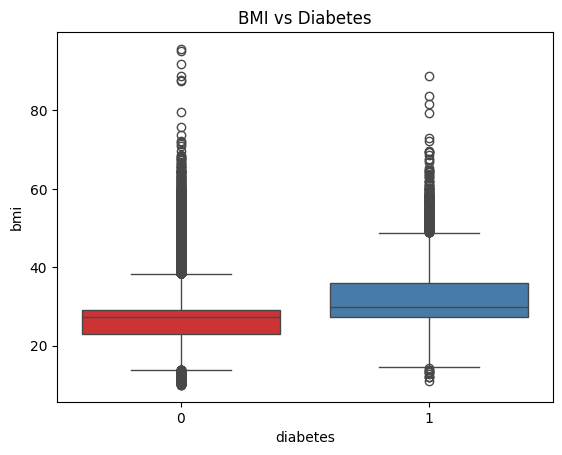

In [24]:
sns.boxplot(x='diabetes', y='bmi', data=df, palette="Set1" )
plt.title('BMI vs Diabetes')
plt.show()

ASSOCIATION BETWEEN HYPERTENSION AND DIABETES

Chi-square test ( to find the association or relationship  between 2 nomimal variables)

In [25]:
from scipy.stats import chi2_contingency

# Build contingency table
table = pd.crosstab(df['hypertension'], df['diabetes'])

# Run test
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}")


Chi2 = 3678.83, p-value = 0.0000


In [26]:
percent_table = pd.crosstab(df['hypertension'], df['diabetes'], normalize='index') * 100

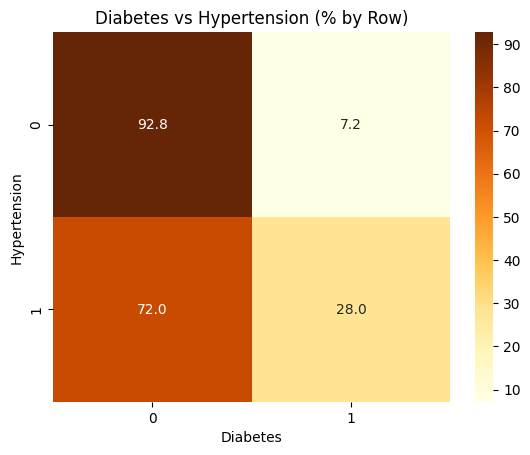

In [27]:
sns.heatmap(percent_table, annot=True, fmt=".1f", cmap="YlOrBr")
plt.title("Diabetes vs Hypertension (% by Row)")
plt.xlabel("Diabetes")
plt.ylabel("Hypertension")
plt.show()

Create bmi group to see in which group the diabetes affected most

In [28]:

df['bmi_group'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 35, 100],
                         labels=['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II+'])

bmi_stats = df.groupby('bmi_group')['diabetes'].mean()
print(bmi_stats)

bmi_group
Underweight   0.01
Normal        0.04
Overweight    0.08
Obese I       0.15
Obese II+     0.22
Name: diabetes, dtype: float64


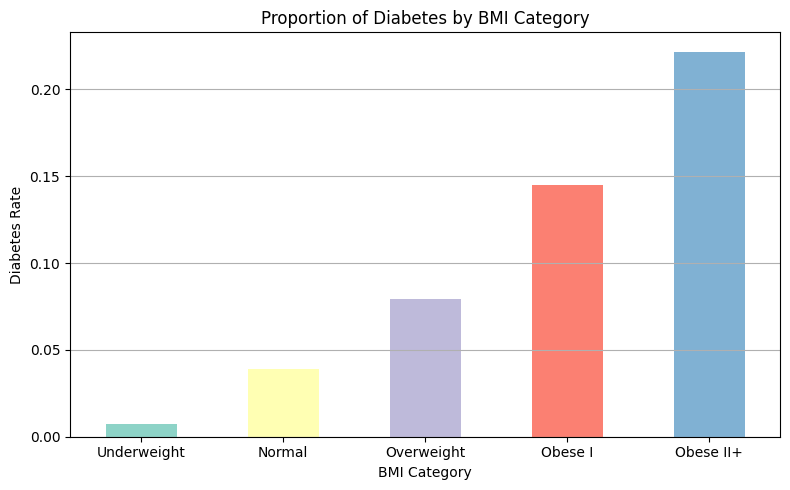

In [29]:
colors = plt.get_cmap("Set3").colors

bmi_stats.plot(kind='bar', figsize=(8, 5), color=colors)
plt.title('Proportion of Diabetes by BMI Category')
plt.ylabel('Diabetes Rate')
plt.xlabel('BMI Category')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()

In [30]:
df = df.drop(columns=['bmi_group'])

#Outliers
Checking for outliers in numeric columns is an important part of data analysis. Outliers can:

    Skew your mean and standard deviation

    Affect correlations

    Impact visualizations

    Mislead your interpretation if not handled properly

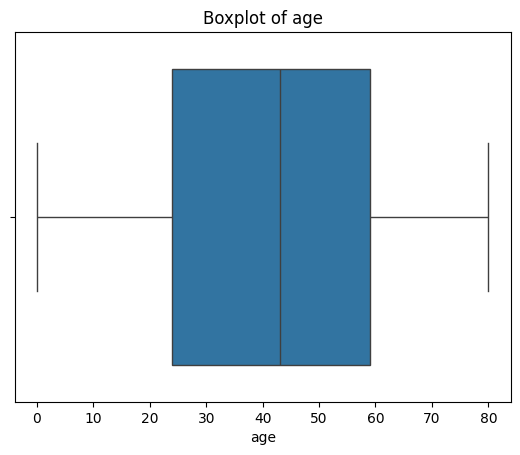

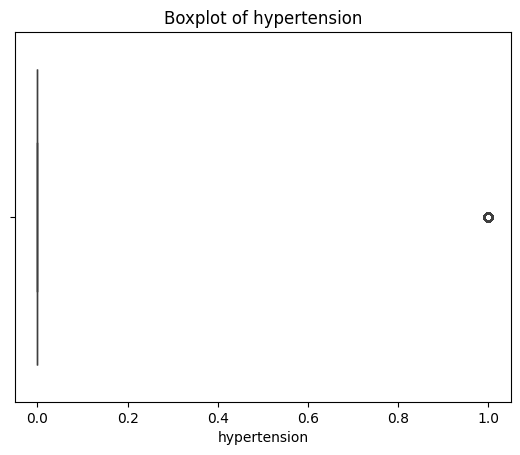

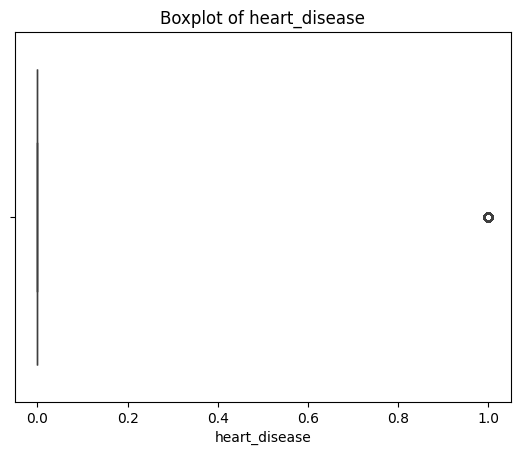

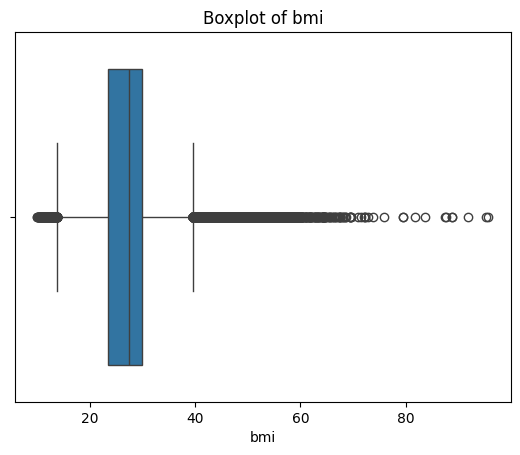

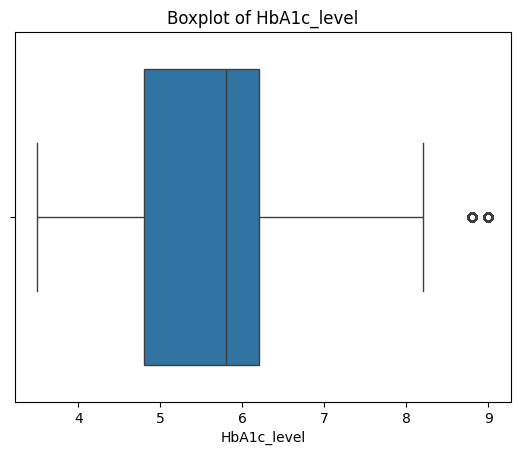

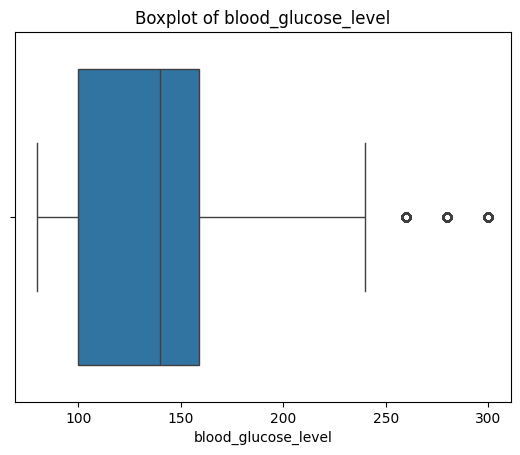

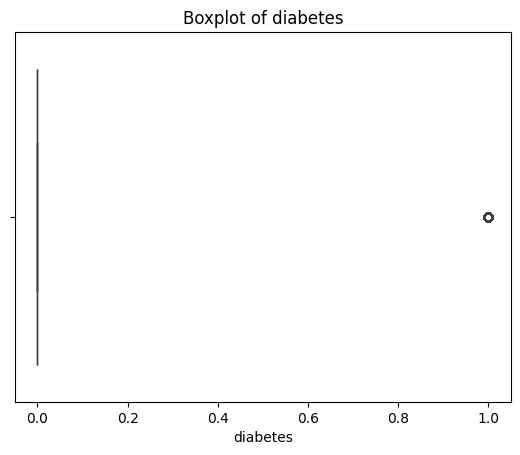

In [31]:
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [32]:
def measure_outliers(df):
    outlier_summary = {}

    # Select numeric columns
    num_cols = df.select_dtypes(include=['number']).columns

    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = outliers.shape[0]
        total = df.shape[0]
        percentage = (outlier_count / total) * 100

        outlier_summary[col] = {
            'Outliers': outlier_count,
            'Total': total,
            'Percentage': round(percentage, 2)
        }

    return pd.DataFrame(outlier_summary).T

# Run the function
outlier_report = measure_outliers(df)
print(outlier_report)


                     Outliers    Total  Percentage
age                      0.00 96128.00        0.00
hypertension          7461.00 96128.00        7.76
heart_disease         3923.00 96128.00        4.08
bmi                   5354.00 96128.00        5.57
HbA1c_level           1312.00 96128.00        1.36
blood_glucose_level   2031.00 96128.00        2.11
diabetes              8482.00 96128.00        8.82


#CORRELATION MATRIX I
ONLY FOR NUMERIC

In [33]:
correlation_matrix = df.corr(numeric_only=True)  # Only numeric columns
print(correlation_matrix)

                     age  hypertension  heart_disease  bmi  HbA1c_level  \
age                 1.00          0.26           0.24 0.34         0.11   
hypertension        0.26          1.00           0.12 0.15         0.08   
heart_disease       0.24          0.12           1.00 0.06         0.07   
bmi                 0.34          0.15           0.06 1.00         0.08   
HbA1c_level         0.11          0.08           0.07 0.08         1.00   
blood_glucose_level 0.11          0.08           0.07 0.09         0.17   
diabetes            0.26          0.20           0.17 0.21         0.41   

                     blood_glucose_level  diabetes  
age                                 0.11      0.26  
hypertension                        0.08      0.20  
heart_disease                       0.07      0.17  
bmi                                 0.09      0.21  
HbA1c_level                         0.17      0.41  
blood_glucose_level                 1.00      0.42  
diabetes                    

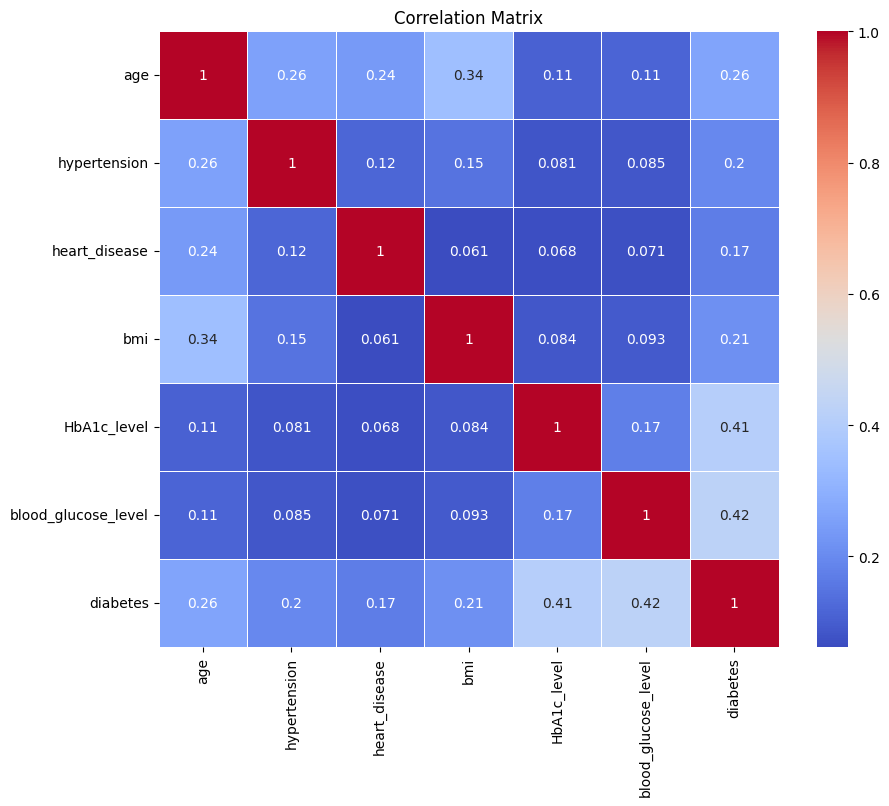

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [35]:
# Define a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(df['smoking_history'].value_counts())

smoking_history
non-smoker     67276
past_smoker    19655
current         9197
Name: count, dtype: int64


In [36]:
data = df.copy()

#ENCODING
This is the process to trnasform the categorical into numerical variable so to compare them all together in the correlation matrix

In [37]:
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df

# Perform one-hot encoding on the gender variable
data = perform_one_hot_encoding(data, 'gender')

# Perform one-hot encoding on the smoking history variable
data = perform_one_hot_encoding(data, 'smoking_history')

                              age  hypertension  heart_disease   bmi  \
age                          1.00          0.26           0.24  0.34   
hypertension                 0.26          1.00           0.12  0.15   
heart_disease                0.24          0.12           1.00  0.06   
bmi                          0.34          0.15           0.06  1.00   
HbA1c_level                  0.11          0.08           0.07  0.08   
blood_glucose_level          0.11          0.08           0.07  0.09   
diabetes                     0.26          0.20           0.17  0.21   
gender_Female                0.03         -0.01          -0.08  0.02   
gender_Male                 -0.03          0.01           0.08 -0.02   
smoking_history_current      0.03          0.02           0.01  0.05   
smoking_history_non-smoker  -0.23         -0.07          -0.09 -0.15   
smoking_history_past_smoker  0.24          0.07           0.09  0.13   

                             HbA1c_level  blood_glucose_level  

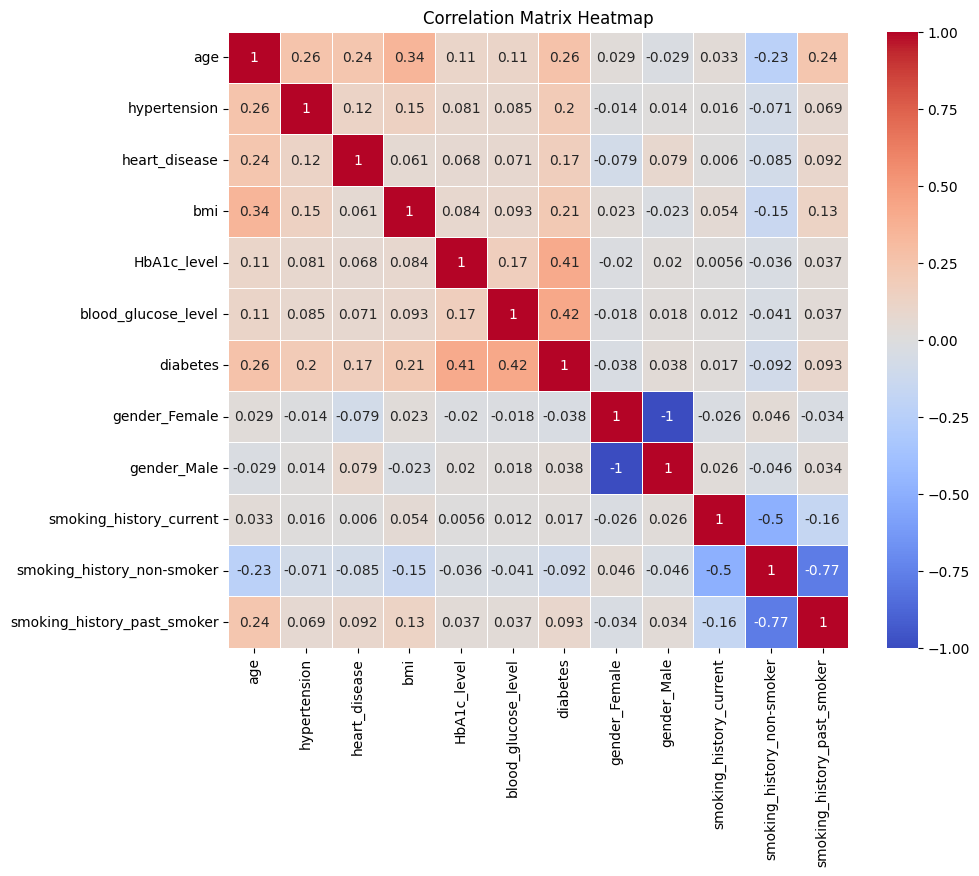

In [38]:
correlation_matrix = data.corr(numeric_only=True)  # Only numeric columns
print(correlation_matrix)

#Graph 1
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


Create a Heatmap of correlations and sort them in descending order

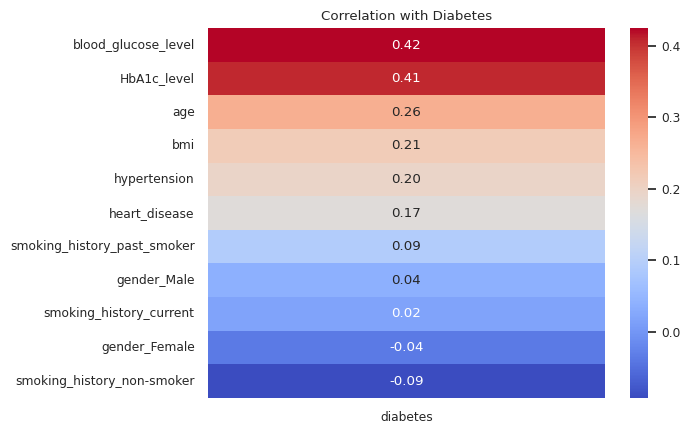

In [39]:
# Graph 2
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

Based the data analysis that i have done we can answer the following questions:


1. From the aforementioned variables (or factors) are related strongly with the disease of diabetes and what is the less related srongly  ?

Based the correlation matrix the most related (strongly) with the disease of diabetes is blood glucose level.

2. How specific variables such as BMI, age, HbA1c, smoking history, blood glucose levels differ between diabetic and non - diabetic groups ?
3. Are males or females more vulnerable?

Based the correlation matrix the men are more valnurable than the women.

4. What BMI range has the highest prevalence of diabetes?

I create a variable bmi_range, so based this range and the bibliography the most affected variable is obese type 2 with range ( > 40).

5. Are hypertensive patients more prone to diabetes than non-hypertensive patients?

Based the heatmap among non-hypertensive people, only 7,2% have diabetes while the hypertensive people 28% have diabetes. That mean approximately the hypertensive patients have 4x more likely to have diabetes compare to non-hypertensive ones.

6. What is the relationship between smoking history and diabetes prevalence?

Smoking history shows a weak relationship with diabetes.
Past smokers are slightly more likely to be diabetic, while non-smokers are slightly less likely. Of course, this variable is not a strong predictor of diabetes in this dataset.


